In [4]:
import numpy as np
import pdb
import dill
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import json
from glob import glob


In [52]:
result_dir = "/home/yuxiaoc/repos/ngc_workspace/eval_result"
results = list()
alias = {"GroundTruth":"GT","HierAgentAware":"HAA","Hierarchical":"Hier","BC":"BC","TPP":"TPP","TrafficSim":"TS"}
for file in os.listdir(result_dir):
    if os.path.isdir(os.path.join(result_dir,file)):
        config=json.load(open(os.path.join(result_dir,file,"config.json"), "r"))
        stats=json.load(open(os.path.join(result_dir,file,"stats.json"), "r"))
        eval_class = config["eval_class"]
        sigma = config["perturb"]["OU"]["sigma"]           
        for k,v in stats.items():
            if k not in ["scene_index","ego_cvae_metrics_gt_loglikelihood"]:
                results.append({"class":alias[eval_class],"sigma":sigma,"key":k,"value":np.mean(v)})
                # print(k,":,",np.mean(v))

In [25]:
def get_comparison(results,key,condition,index_var):
    xlabel = list()
    yvalue = list()
    for entry in results:
        flag = True
        flag = flag & (entry["key"]==key)
        for cond_k,cond_v in condition.items():
            flag = flag & (entry[cond_k]==cond_v)
        if flag:
            xlabel.append(entry[index_var])
            yvalue.append(entry["value"])
    return xlabel,yvalue

<BarContainer object of 6 artists>

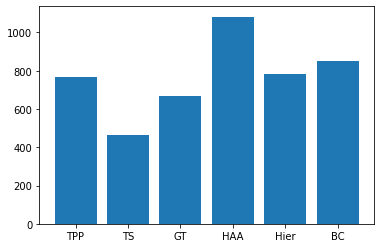

In [57]:
xlabel,yvalue = get_comparison(results,"all_occupancy_coverage_total",{"sigma":0.1},"class")


plt.bar(xlabel,yvalue)

<BarContainer object of 6 artists>

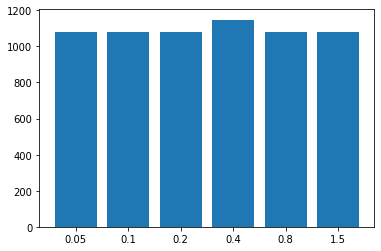

In [55]:
xlabel,yvalue = get_comparison(results,"all_occupancy_coverage_total",{"class":"HAA"},"sigma")
xlabel,yvalue = np.array(xlabel), np.array(yvalue)
idx = np.argsort(xlabel)
xlabel,yvalue = xlabel[idx],yvalue[idx]
xlabel_str = [str(tick) for tick in xlabel]

plt.bar(xlabel_str,yvalue)